# Workflow Debugging

0.9624060150375939
Compilation paths from Test Data:  {0, 2, 5, 6, 7, 8}
Compilation paths from Predictions:  {0, 2, 4, 5, 6, 7, 8}
len(y_predicted) 133


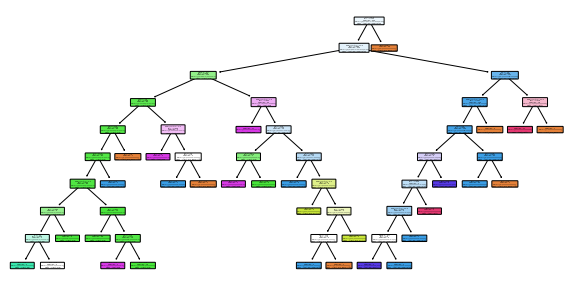

<Figure size 1224x432 with 0 Axes>

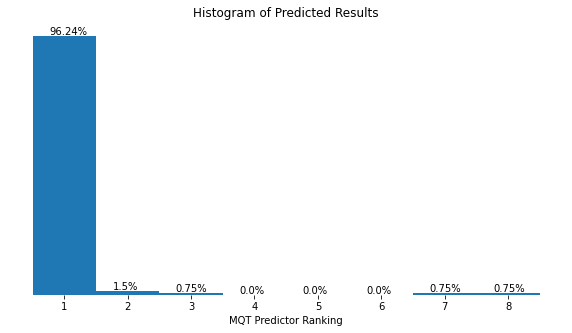

sum:  99.99


/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(max_depth=10)

In [16]:
from predictor.driver import Predictor
from predictor.src import utils

import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


training_data, names_list, scores_list = Predictor.extract_training_data_from_json("json_data.json", True)
X, y = zip(*training_data)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#non_zero_indices = []
#for i in range(len(X[0])):
#    if sum(X[:,i]) > 0:
#        non_zero_indices.append(i)
#X = X[:, non_zero_indices]
# openqasm_gates_list = utils.get_openqasm_gates()
# res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
# res.append("num_qubits")
# features = np.sort(np.array(res))
# features = features[non_zero_indices]
# print(features)


#scaler = preprocessing.StandardScaler().fit(X)
#X = preprocessing.normalize(X, norm='l2')
#X = scaler.transform(X)

Predictor.train_decision_tree_classifier(X,y, names_list, scores_list, max_depth=10)

# Other Tree Plot Types

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(23, 5))
clf = Predictor._clf


from dtreeviz.trees import dtreeviz # remember to load the package
machines = [
        "qiskit_ibm_washington",
        "qiskit_ibm_montreal",
        "qiskit_ionq",
        "qiskit_rigetti",
        "qiskit_oqc",
        "tket_ibm_washington",
        "tket_ibm_montreal",
        "tket_ionq",
        "tket_rigetti",
        "tket_oqc",
    ]
openqasm_gates_list = utils.get_openqasm_gates()
res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
res.append("num_qubits")
features = np.sort(np.array(res))

X, y, indices = np.array(X), np.array(y), np.array(range(len(y)))
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, indices, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name="target",
               feature_names=features,
               class_names=machines,
               fancy=True
)
viz.save_svg()
viz


In [ ]:
import graphviz
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
               feature_names=features,
               class_names=machines,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("graphviz")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = clf.predict(X_test)
classes = [utils.get_machines()[i] for i in set(y_test)]
res = precision_recall_fscore_support(y_test, y_pred)

with open('metric_table.csv','w') as csvfile:
    np.savetxt(csvfile, np.array([classes]),delimiter=',',fmt='%s')
    np.savetxt(csvfile, np.array(res),delimiter=',',fmt='%s')

In [ ]:
np.array([1,2,3])

In [ ]:
np.array(list(set(y_test)))

In [7]:
from qiskit import QuantumCircuit

In [8]:
from mqt.bench import get_one_benchmark

In [10]:
qc = get_one_benchmark("ghz", 1, 5)
qc.draw()

┌───┐ ░ ┌─┐            
   q_0: ────────────────────┤ X ├─░─┤M├────────────
                       ┌───┐└─┬─┘ ░ └╥┘┌─┐         
   q_1: ───────────────┤ X ├──■───░──╫─┤M├─────────
                  ┌───┐└─┬─┘      ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──■────────░──╫──╫─┤M├──────
             ┌───┐└─┬─┘           ░  ║  ║ └╥┘┌─┐   
   q_3: ─────┤ X ├──■─────────────░──╫──╫──╫─┤M├───
        ┌───┐└─┬─┘                ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├──■──────────────────░──╫──╫──╫──╫─┤M├
        └───┘                     ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [12]:
d = qc.count_ops()

In [14]:
d["cx"]

4